In [1]:
import xarray as xr
from odc.geo.xr import assign_crs
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np

## Plot WCF fraction

In [2]:
base = '/g/data/os22/chad_tmp/climate-carbon-interactions/data/'
trees = xr.open_dataset(base+'5km/WCF_5km_monthly_1982_2022.nc')['WCF']
trees = assign_crs(trees, crs ='epsg:4326')
trees = trees.sel(time=slice('2001', '2018'))
trees = trees.mean('time')

# if model_var=='NDVI':
#     if name=='trees':
#         mask = xr.where(trees>0.25, 1, 0)
#     if name=='nontrees':
#         mask = xr.where(trees<=0.25, 1, 0)

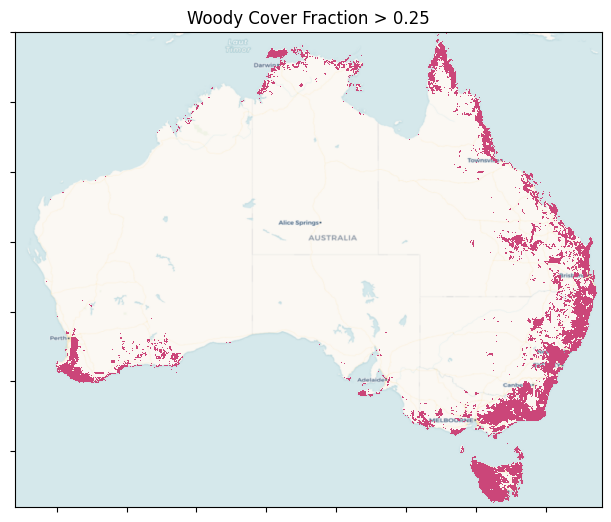

In [3]:
fig,ax=plt.subplots(1,1, figsize=(6,6),sharey=True, layout='constrained')
# im = trees.where(trees>0.25).plot(ax=ax)
im = xr.where(trees>0.25, 1, np.nan).plot(ax=ax, cmap='plasma_r', add_labels=False, add_colorbar=False)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager, crs='EPSG:4326', attribution='', attribution_size=1)
ax.set_title('Woody Cover Fraction > 0.25')
# cb = fig.colorbar(im, ax=ax, shrink=0.5, orientation='horizontal', label='Woody Cover Fraction');
# cb.ax.xaxis.set_label_position('top')
ax.set_yticklabels([])
ax.set_xticklabels([]);

## Plot training samples

In [4]:
import geopandas as gpd

In [5]:
gdf = gpd.read_file(f'/{base}LST_harmonization/LGBM/LST_AUS_CLIM_validation_data.geojson')

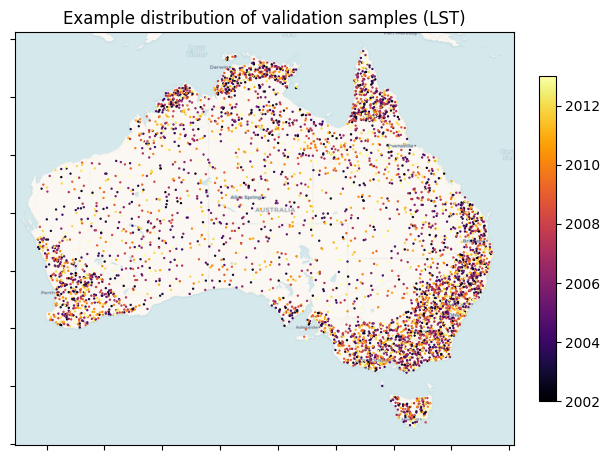

In [8]:
fig,ax=plt.subplots(1,1, figsize=(6,6),sharey=True, layout='constrained')
gdf.plot(column='year', markersize=0.5, cmap='inferno', ax=ax, legend=True,legend_kwds={'shrink':0.55})
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager, crs='EPSG:4326', attribution='', attribution_size=1)
ax.set_title('Example distribution of validation samples (LST)');
# cb = fig.colorbar(im, ax=ax, shrink=0.5, orientation='vertical', label='Year');
# cb.ax.xaxis.set_label_position('top')
ax.set_yticklabels([])
ax.set_xticklabels([]);